## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Business Problem

The stakeholder is a real estate agency that wants to establish its group in the King's County area. Their aim is to find homes that will gross high. They want to be able to obtain a model that predicts housing prices from various parameters and then maximize the gross from houses they either build or buy.

## Import Data and Clean the Data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# import the dataset
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# look at columns to see what can be dropped immediately
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Columns to drop:
* id: non-descriptive
* date: non-descriptive because all of the homes were sold from 2014-2015

In [4]:
# drop identified columns
df = df.drop(['id', 'date'], axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# check for null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Columns containing null objects: yr_renovated, waterfront
* I will assume that null values in yr_renovated have not been renovated and will set missing values to 0
* I will assume that null values in waterfront are not waterfront properties and will set these missing values to 0.

In [6]:
# set NA values in yr_renovated and waterfront to 0
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [7]:
# handle values of waterfront, grade, etc... object columns
obj_cols = ['waterfront', 'view', 'condition', 'grade', 'sqft_basement']
for c in obj_cols:
    print(df[c].unique())

[0 'NO' 'YES']
['NONE' 0 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0' '720.0' '700.0' '820.0' '780.0' '790.0' '330.0' '1620.0' '360.0'
 '588.0' '1510.0' '410.0' '990.0' '600.0' '560.0' '550.0' '1000.0'
 '1600.0' '500.0' '1040.0' '880.0' '1010.0' '240.0' '265.0' '290.0'
 '800.0' '540.0' '710.0' '840.0' '380.0' '770.0' '480.0' '570.0' '1490.0'
 '620.0' '1250.0' '1270.0' '120.0' '650.0' '180.0' '1130.0' '450.0'
 '1640.0' '1460.0' '1020.0' '1030.0' '750.0' '640.0' '1070.0' '490.0'
 '1310.0' '630.0' '2000.0' '390.0' '430.0' '850.0' '210.0' '1430.0'
 '1950.0' '440.0' '220.0' '1160.0' '860.0' '580.0' '2060.0' '1820.0'
 '1180.0' '200.0' '1150.0' '1200.0' '680.0' '530.0' '1450.0' '1170.0'
 '1080.0' '960.0' '280.0' '870.0' '1100.0' '460.0' '1400.0' '660

In [8]:
# handle values in object columns

# waterfront
df.loc[df['waterfront'] == 'NO', 'waterfront'] = 0
df.loc[df['waterfront'] == 'YES', 'waterfront'] = 1

# view
df.loc[df['view'] == 'NONE', 'view'] = 0
df.loc[df['view'] == 'FAIR', 'view'] = 1     # fair will be 1
df.loc[df['view'] == 'AVERAGE', 'view'] = 2      # average will be 2
df.loc[df['view'] == 'GOOD', 'view'] = 3    # good is 3
df.loc[df['view'] == 'EXCELLENT', 'view'] = 4     # excellent is 4

# condition
df.loc[df['condition'] == 'Poor', 'condition'] = 0
df.loc[df['condition'] == 'Fair', 'condition'] = 1     # fair will be 1
df.loc[df['condition'] == 'Average', 'condition'] = 2      # average will be 2
df.loc[df['condition'] == 'Good', 'condition'] = 3    # good is 3
df.loc[df['condition'] == 'Very Good', 'condition'] = 4     # very good is 4

# grade
df.loc[df['grade'] == '3 Poor', 'grade'] = 0
df.loc[df['grade'] == '4 Low', 'grade'] = 1     
df.loc[df['grade'] == '5 Fair', 'grade'] = 2      
df.loc[df['grade'] == '6 Low Average', 'grade'] = 3    
df.loc[df['grade'] == '7 Average', 'grade'] = 4     
df.loc[df['grade'] == '8 Good', 'grade'] = 5
df.loc[df['grade'] == '9 Better', 'grade'] = 6    
df.loc[df['grade'] == '10 Very Good', 'grade'] = 7      
df.loc[df['grade'] == '11 Excellent', 'grade'] = 8    
df.loc[df['grade'] == '12 Luxury', 'grade'] = 9     
df.loc[df['grade'] == '13 Mansion', 'grade'] = 10     

# sqft_basement - convert from string to float
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = '0'     # handle ?

# convert altered values to integer
for c in obj_cols:
    # prevent issues of casting int to the string '0.0'
    if c == 'sqft_basement':
        df = df.astype({c: float})
        df = df.astype({c: int})
    else:
        df = df.astype({c: int})

# check
for c in obj_cols:
    print(df[c].unique())

[0 1]
[0 3 4 2 1]
[2 4 3 0 1]
[ 4  3  5  8  6  2  7  9  1  0 10]
[   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  710  840  380  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
  280  870 1100  460 1400  660 1220  900  420 1580 1380  475  690  270
  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470  370
  140 1760  130  520  890 1110  150 1720  810  190 1290  670 1800 1120
 1810   60 1050  940  310  930 1390  610 1830 1300  510 1330 1590  920
 1320 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520 1850
 1660 2130 2

In [9]:
# check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int32  
 7   view           21597 non-null  int32  
 8   condition      21597 non-null  int32  
 9   grade          21597 non-null  int32  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## Initial Exploration of Data

### Histogram of each variable

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

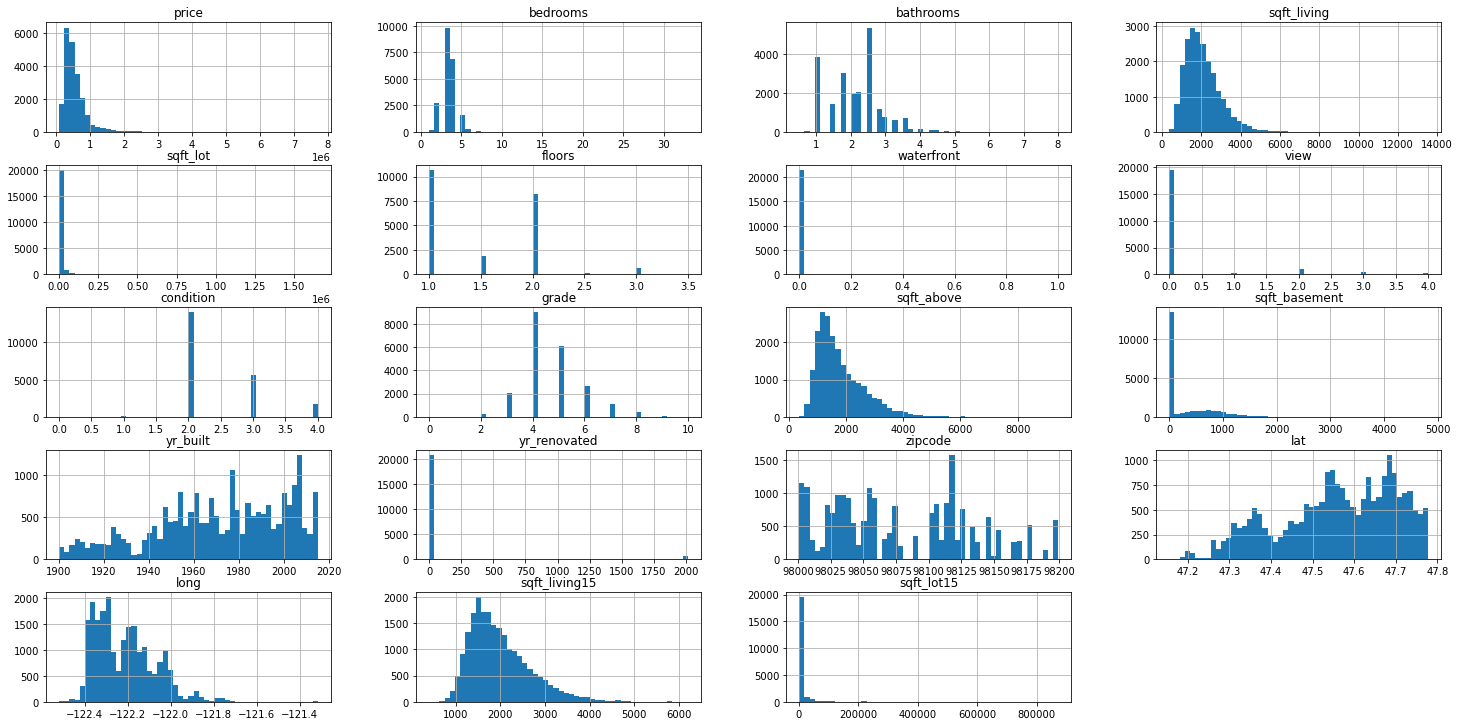

In [10]:
# plot histograms of all the columns in the set.
df.hist(bins=50, figsize=(25, 12.5))

Observations: 
* price, sqft_living, sqft_above, and sqft_living look approximately log-normally distributed.
* Most homes have 1-5 bedrooms
* long and lat look approximately to follow a trimodal distribution
* most homes do not have a view nor are waterfront properties
* most homes have a condition of 2 and many have a condition of 3
* grade is roughly normally distributed.
* most homes do not have a basement

### Scatterplot of each variable and price

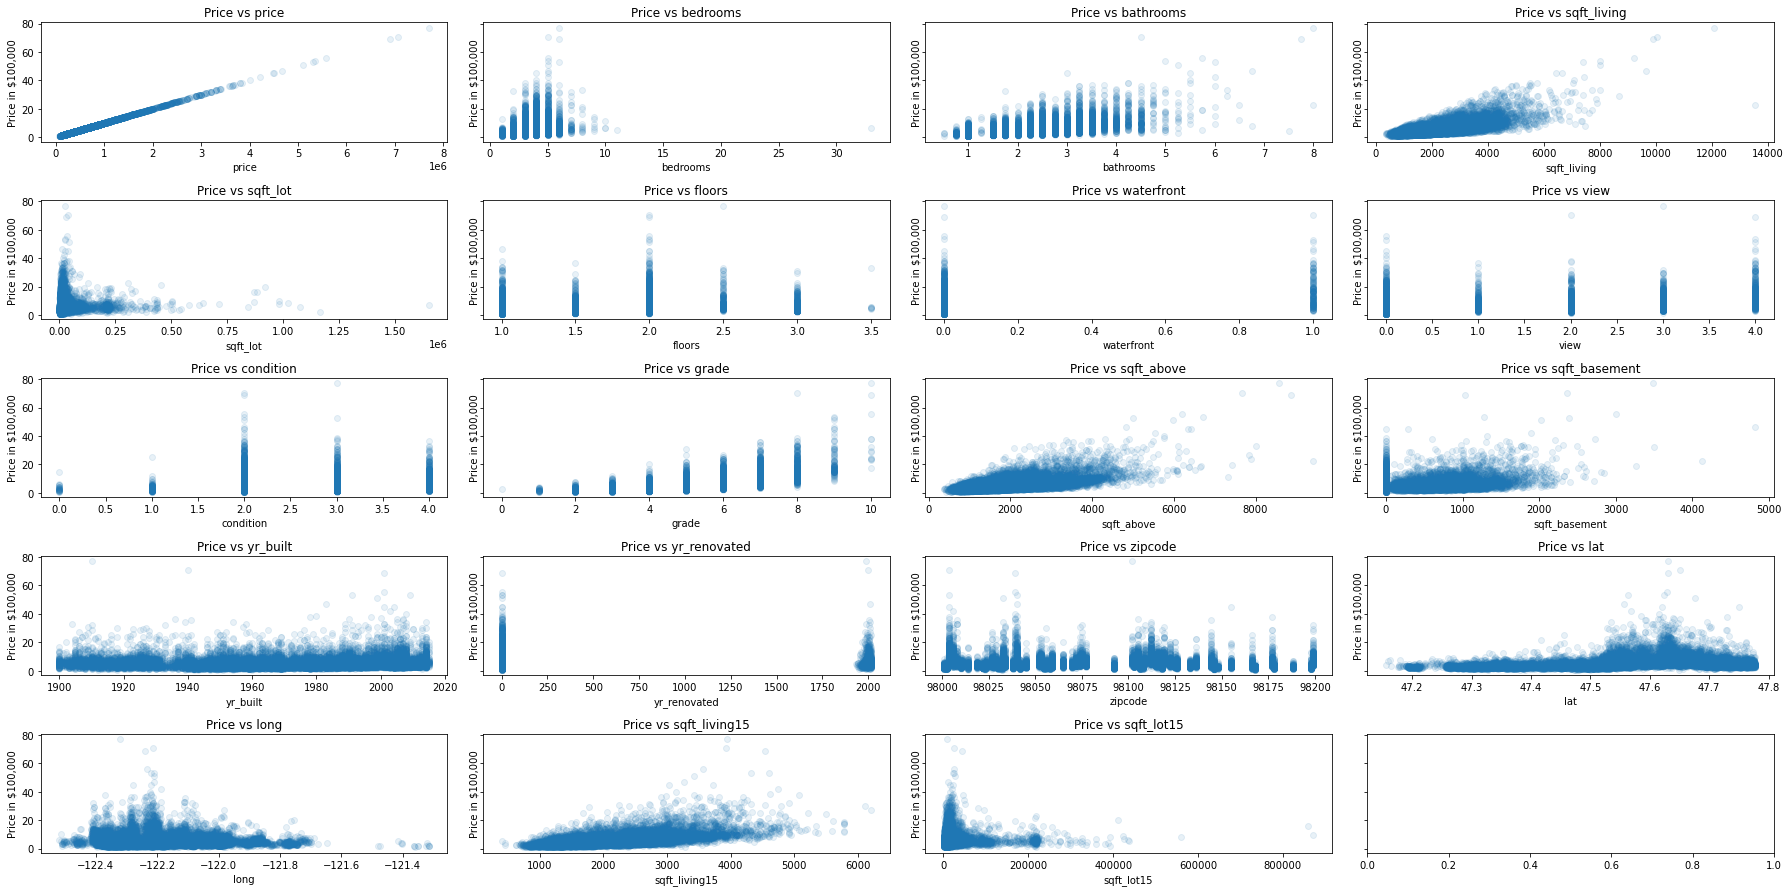

In [11]:
# visualize scatterplots of histograms with price as y variable
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

Observations:
* sqft_living and price are fairly linearly related.
* grade and price are somewhat linearly related
* sqft_above and sqft_living15 are somewhat linearly related to price.

### Correlation heatmap

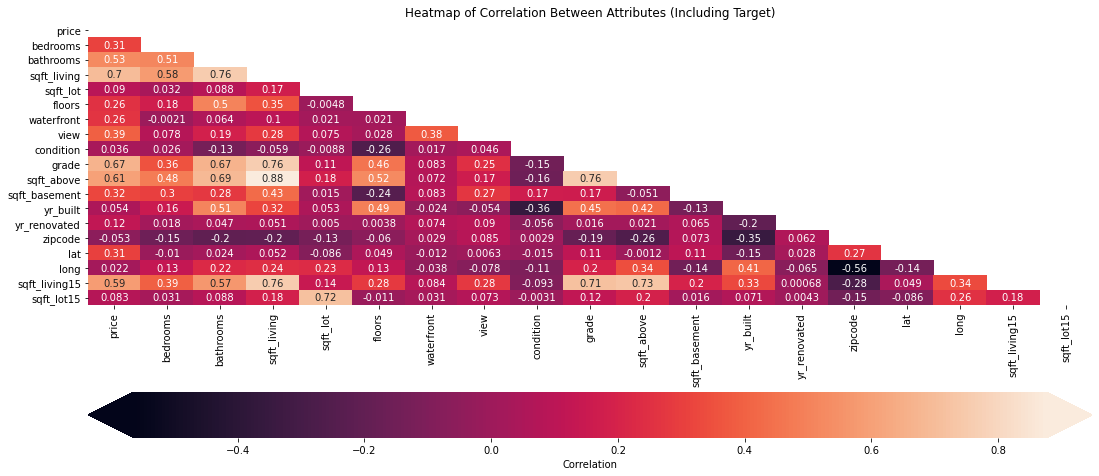

In [12]:
# adapted from dsc-linear-regression-lab
# author: hoffm386
# link: https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution
heatmap_data = df
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(18, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2,
              "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Observations:
* sqft_living, grade, and sqft_above are all correlated above 0.6

## Modeling

### Helper functions for modeling

In [13]:
# establish LinearRegression() variable for later use
lr = LinearRegression()

# import for finding r-squared value
from sklearn.metrics import r2_score

In [14]:
# this function places the data in train_test_split and builds a linear
# regression model. 
# Inputs: parameters for modeling & target variable
# Returns: r-squared value
def lin_model (X,y):
    # split into train and test. Use default split size of 0.25 and use same
    # random_state for consistency
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
    
    # fit the model
    lr.fit(X_train, y_train)
    
    # return r-squared
    return lr.score(X_train, y_train)

### Model 1

I will use sqft_living and grade for the first model. Grade may be tricky because it is categorical. It may need to be treated with dummy variables, label encoding, or some other method in future models.

In [15]:
# establish X and y, then use lin_model to build the model.
X = df[['grade', 'sqft_living']]
y = df['price']

lin_model(X,y)

0.5382275583146765

R-squared of about .54 is not great, but it is a start.
Visualization of error is below.

C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


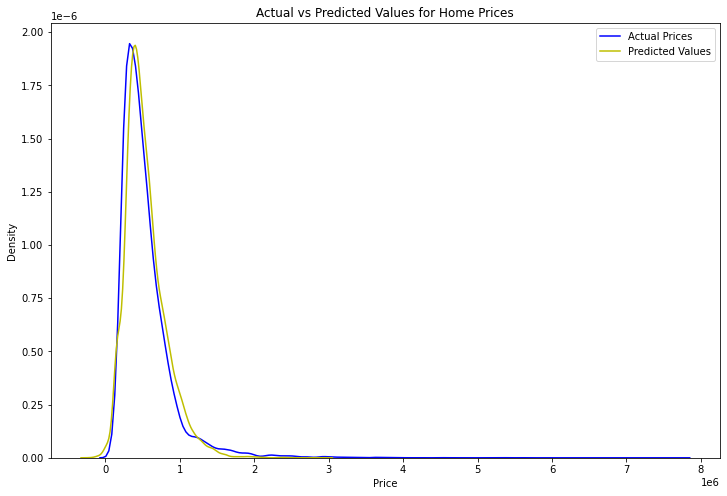

In [16]:
# visualize the error
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
y_hat = lr.predict(X_train)

plt.figure(figsize=(12, 8))

ax = sns.distplot(df['price'], hist=False, color="b", label="Actual Prices")
sns.distplot(y_hat, hist=False, color="y", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Home Prices')
plt.xlabel('Price')
plt.ylabel('Density')

plt.legend()
plt.show()
plt.close()

### Model 2

This model will utilize sqft_living and grade again, but it will handle grade with a method used for transforming categorical variables.

#### Create dummy variables for grade

In [17]:
# create copy of df for new model - just keep three needed columns
df1 = df[['grade','price','sqft_living']].copy()

# dummy variables for grade
dummies = pd.get_dummies(df1['grade'], prefix='grade', drop_first=True)

df1 = df1.drop(['grade'], axis=1)
df1 = pd.concat([df1, dummies], axis=1)

df1

,price,sqft_living,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10
0,221900.0,1180,0,0,0,1,0,0,0,0,0,0
1,538000.0,2570,0,0,0,1,0,0,0,0,0,0
2,180000.0,770,0,0,1,0,0,0,0,0,0,0
3,604000.0,1960,0,0,0,1,0,0,0,0,0,0
4,510000.0,1680,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,0,0,0,0,1,0,0,0,0,0
21593,400000.0,2310,0,0,0,0,1,0,0,0,0,0
21594,402101.0,1020,0,0,0,1,0,0,0,0,0,0
21595,400000.0,1600,0,0,0,0,1,0,0,0,0,0


#### Create and evaluate the model

In [18]:
# establish X and y, then use lin_model to build the model.
X = df1.drop(['price'], axis=1)
y = df1['price']

lin_model(X,y)

0.5872085661041189

That's an improvement from the first model, but it's still not great. It's time to incorporate some other variables and possibly try to normalize some of the variables that look log-normal.

### Model 3

Plan: Log-normalize relevant variables and incorporate more variables in the linear regression model.

#### Log-normalization

Log-normalize the following variables: price, sqft_living, sqft_above, sqft_living15. All follow a roughly log-normal distribution.

In [19]:
# instantiate new df for this model
df2 = df.copy()

# initialize list of variables to log-normalize
log_norm_cats = ['price', 'sqft_living', 'sqft_above', 'sqft_living15']

for c in log_norm_cats:
    c_log = np.log(df2[c])     # apply normalization
    df2 = df2.drop([c], axis=1)     # drop old column
    df2[c] = c_log     # append normalized column to df

# print head and tail of modified df
df2

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,price,sqft_living,sqft_above,sqft_living15
0,3,1.00,5650,1.0,0,0,2,4,0,1955,0.0,98178,47.5112,-122.257,5650,12.309982,7.073270,7.073270,7.200425
1,3,2.25,7242,2.0,0,0,2,4,400,1951,1991.0,98125,47.7210,-122.319,7639,13.195614,7.851661,7.682482,7.432484
2,2,1.00,10000,1.0,0,0,2,3,0,1933,0.0,98028,47.7379,-122.233,8062,12.100712,6.646391,6.646391,7.908387
3,4,3.00,5000,1.0,0,0,4,4,910,1965,0.0,98136,47.5208,-122.393,5000,13.311329,7.580700,6.956545,7.215240
4,3,2.00,8080,1.0,0,0,2,5,0,1987,0.0,98074,47.6168,-122.045,7503,13.142166,7.426549,7.426549,7.495542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3.0,0,0,2,5,0,2009,0.0,98103,47.6993,-122.346,1509,12.793859,7.333023,7.333023,7.333023
21593,4,2.50,5813,2.0,0,0,2,5,0,2014,0.0,98146,47.5107,-122.362,7200,12.899220,7.745003,7.745003,7.512071
21594,2,0.75,1350,2.0,0,0,2,4,0,2009,0.0,98144,47.5944,-122.299,2007,12.904459,6.927558,6.927558,6.927558
21595,3,2.50,2388,2.0,0,0,2,5,0,2004,0.0,98027,47.5345,-122.069,1287,12.899220,7.377759,7.377759,7.251345


#### Create and evaluate the model

In [20]:
# establish X and y, then use lin_model to build the model.
X = df2.drop(['price'], axis=1)
y = df2['price']

lin_model(X,y)

0.774549108958348

The r-squared value is about 78%, which seems to represent a pretty good metric for the stakeholder to use as a model for at least a decent starting point for evaluating prospective homes.

## Interpretation of Model

### Finding 1: R-squared value

Model 3 has an r-squared value of about 78%, which means that is able to explain about 78% of the variance of the actual data points from the predicted values represented by the model.
Below is a visualization of the model versus the actual values. Keep in mind that the actual values were log-normalized, so the error represented by the difference between actual vs. predicted values is extrapolated to a much larger degree than, say, the first model's visual representation of error.

C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


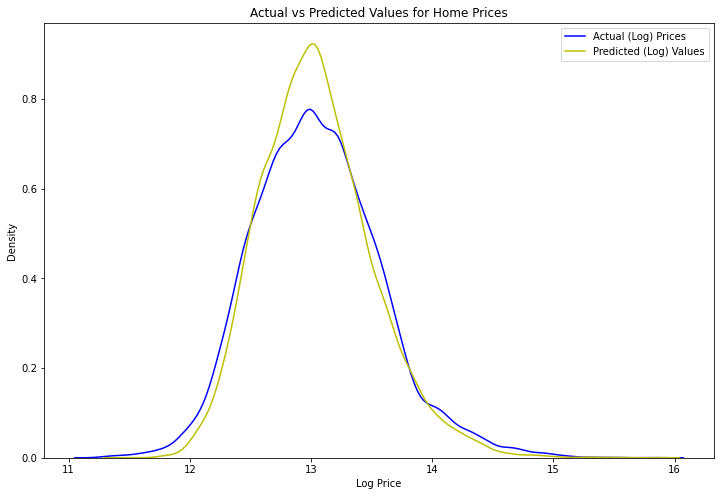

In [21]:
# visualize the error in model 3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
y_hat = lr.predict(X_train)

plt.figure(figsize=(12, 8))

ax = sns.distplot(df2['price'], hist=False, color="b", 
                  label="Actual (Log) Prices")
sns.distplot(y_hat, hist=False, color="y", label="Predicted (Log) Values" ,
             ax=ax)


plt.title('Actual vs Predicted Values for Home Prices')
plt.xlabel('Log Price')
plt.ylabel('Density')

plt.legend()
plt.show()
plt.close()

As seen by this visualization and the r-squared value, the model is not perfect. However, it does at least offer a very good starting point for ruling out homes or further investigating homes to build or buy. It can also offer a way in which the stakeholder can understand whether a particular home may be under or overvalued.

### Finding 2: Most significant model coefficients

In [29]:
# create df with coefficient names and values

# re-establish linear regression model to extract relevant info
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
lr.fit(X_train, y_train)

# define names and values of the coefficients
co_names = df2.columns
co_values = lr.coef_

# create df with these variables
df_coefs = pd.DataFrame(list(zip(co_names, co_values)), 
                        columns=['Coefficients', 'Values'])
df_coefs.sort_values(by='Values', ascending=False)     # highest values at top

,Coefficients,Values
12,lat,1.400461e+00
4,waterfront,3.835403e-01
15,price,2.075805e-01
17,sqft_above,1.998535e-01
7,grade,1.649526e-01
16,sqft_living,9.927367e-02
1,bathrooms,6.837461e-02
3,floors,6.740033e-02
5,view,6.665811e-02
6,condition,5.908361e-02


The most significant coefficients are lat, waterfront, and sqft_above. 
Further investigation of why these coefficients are the most significant is offered below.

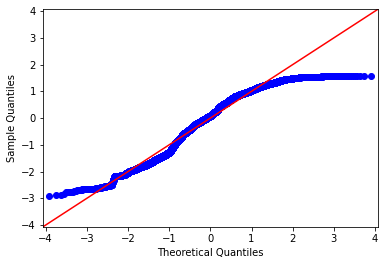

In [32]:
# ceate QQ-plot of lat to investigate linearity
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(df2['lat'], dist=stats.norm, line='45', fit=True)

Latitude is roughly linear and when plotted against price, it has a somewhat trimodal distribution with the first bell curve seeming about half the size as the other two (as seen in 4.1). 
Interpretation of lat characteristics:
* Rough linearity facilitates greater significance in linear regression.
* The trimodality of latitude versus price is insignificant, but latitude trends upward as price does (seen in 4.2), which facilitates greater significance in linear regression.

In [42]:
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

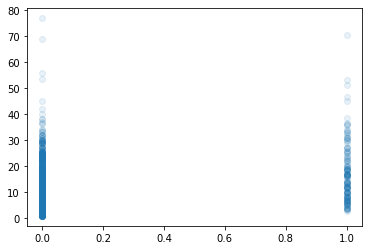

In [45]:
plt.scatter(df['waterfront'], df['price'] / 100_000, alpha=0.1)